# DSP Tutorial to Python, Numpy, and Matplotlib

## Background

We are going to be using the [Python 3](https://www.python.org/) data analysis ecosystem for many of the projects and homework in this class. When you get good at Python, it becomes an indispensable tool. Python itself is a high-level, interpreted general-purpose programming language. It becomes useful for data analysis through add-on libraries such as [NumPy (Numerical Python)](https://numpy.org/), [matplotlib (a plotting and visualization library)](https://matplotlib.org/), and many others. [Anaconda](https://www.anaconda.com/products/individual) is a cross-platform (Windows, Mac, and Linux) distribution and software environment manager that includes almost all of the major data analysis tools that you will need. Python and its data analysis libraries are free and open source but can often provide the same capabilities as the commercial product MATLAB.

There are many different ways to run python code. In this class, we are going to focus on using the [Jupyter Lab / Jupyter Notebook environment](https://jupyter.org/). This is what you are using right now. It provides a friendly, interactive interface to python while giving you the ability to add-in formatted notes and comments. This is done through markdown cells; you can get a basic syntax guide here: https://www.markdownguide.org/basic-syntax/. You can even write equations directly in the markdown cells with $\LaTeX$. [See here for documentation on $\LaTeX$ in Jupyter Notebooks.]( https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html#LaTeX-equations)

Jupyter Notebooks are ideal for prototyping of your own ideas and code, sharing ideas with others, and submitting homework. As you need to do more complcated analysese, you may eventually move to actual python scripts and programming.

## Learning Objectives
The learning objectives of this tutorial are:
1. Become familiar with the fundamentals of Jupyter Notebook and the Python Language.
2. Learn the fundamentals of NumPy and Matplotlib
3. Place these skills in the context of the Signals and Systems concepts we have learned in class so far.

# Imports

In [1]:
# In this cell, we import the libraries and modules we need for our analysis.
# It is good practice to keep all of the imports for a piece of code at the top
# of the file. Note that we can import packages "as" a particular variable. This
# allows us to use a shortcut/abbreviation when refering to that package later
# in the script.

import numpy as np
import matplotlib.pyplot as plt

# The following line tells matplotlib to plot directly in the Jupyter Notebook, as
# opposed to creating a separate window.
%matplotlib inline

In [2]:

plt.rcParams['font.size']      = 18
#plt.rcParams['font.weight']    = 'bold'
plt.rcParams['axes.grid']      = True
plt.rcParams['axes.xmargin']   = 0
plt.rcParams['axes.ymargin']   = 0
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['figure.figsize'] = (8,6)

# Plotting Signals with NumPy and Matplotlib
To introduce NumPy and Matplotlib, we are going to reproduce the plots that were shown during the first lecture that illustrate Analog, Disctrete-Time, Quantized, and Digital Signals. These plots were all based off of the following signal: $x_a(t) = 10t\ \exp(-t)$.

## Analog Signal
To start, we will start with the analog signal. As we said in class, it is not possible for the computer to actually store any type of continuous signal. But, we can make a plot of what looks like a continuous signal by making the sampling interval very small. We will make a time vector that extends from $t = 0$ to $4$ in steps of $0.001$.

In [3]:
# Create the time vector.
t = np.arange(0,4,0.001)

In [4]:
# Print out the time vector.
t

array([0.000e+00, 1.000e-03, 2.000e-03, ..., 3.997e+00, 3.998e+00,
       3.999e+00])

In [5]:
# Note that there are 4000 elements to this time vector.
t.shape

(4000,)

In [6]:
# Since we are going to create a few different signals based on the same formula,
# let's create a function to make it easy to evalaute the formula many times.

def x(t):
    return 10*t*np.exp(-t)

In [7]:
# Now calculate the actual signal.
x_a = x(t)

In [8]:
# Note that the signal x_a has the same shape/number of elements as the time vector t.
x_a.shape

(4000,)

The actual plotting is done below. Note how the axes and tick marks are clearly labeled. You always want your plots to be able to stand on their own. This is not only important for communicating your results to others, but also for yourself. It is easy to build up a collection of many plots in a project and not remember what was actually being plotted because the labels were not done well. 

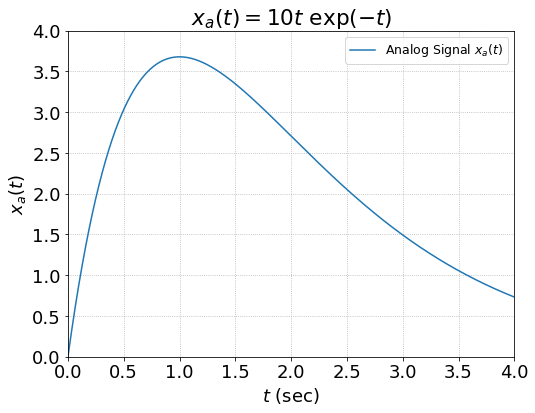

In [9]:
fig = plt.figure()
ax  = fig.add_subplot(111)

lbl = 'Analog Signal $x_a(t)$'
ax.plot(t,x_a,label=lbl)

ax.set_xlim(0,4)
ax.set_ylim(0,4)
ax.set_title('$x_a(t) = 10t\ \exp(-t)$')
ax.set_xlabel('$t$ (sec)')
ax.set_ylabel('$x_a(t)$')

ax.legend(loc='upper right',fontsize='x-small')

plt.show()

## Discrete-Time Signal
We are able to create a discrete time signal from the analog signal by choosing a sampling period $T$, using a vector of itegers $k$, and applying the following formula:
$$x(k) = x_a(kT) = 10kT\ \exp(-kT)$$

Let's choose $T = 0.25$ s and have $k$ be integers from 0 to 16.

In [10]:
# First, define T and k.
T = 0.25
k = np.arange(17) # np.arange defaults starting from 0 and going in steps of 1.

In [11]:
# Note that np.arange is not inclusive of the ending number. That is why we said np.arange(17) to get to 16!
k

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [12]:
# Now we can calculate our discrete-time signal by plugging k*T into the function we defined earlier.
x_k = x(k*T)

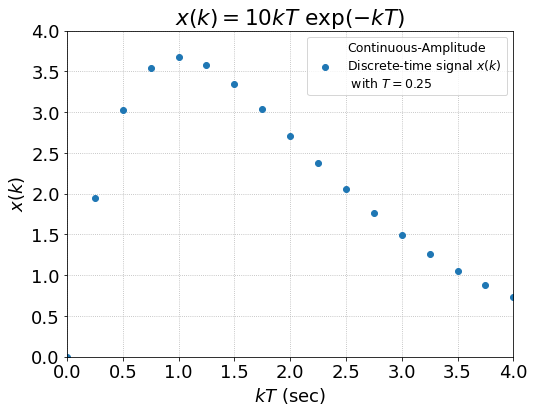

In [13]:
# Now plot the signal. Note that we are now plotting in a discrete mode instead of a connected mode.

fig = plt.figure()
ax  = fig.add_subplot(111)

lbl = 'Continuous-Amplitude\nDiscrete-time signal $x(k)$\n with $T=${!s}'.format(T)
ax.plot(k*T,x_k,marker='o',ls='',label=lbl)

ax.set_xlim(0,4)
ax.set_ylim(0,4)
ax.set_title('$x(k) = 10kT\ \exp(-kT)$')
ax.set_xlabel('$kT$ (sec)')
ax.set_ylabel('$x(k)$')

ax.legend(loc='upper right',fontsize='x-small')
plt.show()

## Quantized Signal

A quantized signal can be generated by running the analog signal through the following operator:
$$Q_N(x) = q \cdot \mathrm{round} \left( \frac{x}{q} \right)$$

Plot the analog signal given above using $q = 0.25$

In [14]:
# Define the quantization function. Note that the documentation string (doc string) is defined right in triple quotes.
def Q_N(x,q):
    """
    Quantize an input function.
    x: input signal
    q: quantization level
    """
    return q*np.round(x/q)

In [15]:
# Define q and calculate the signal.
q   = 0.250
x_q = Q_N(x_a,q)

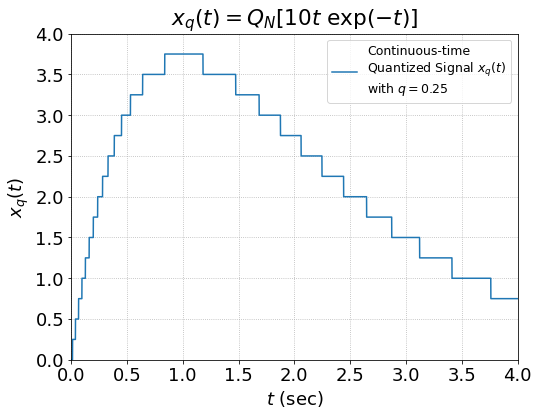

In [16]:
# Plot the quantized signal. Note that we are back in connected plotting mode since this is a continuous-time signal.
fig = plt.figure()
ax  = fig.add_subplot(111)
lbl = 'Continuous-time\nQuantized Signal $x_q(t)$\nwith $q=${!s}'.format(q)
ax.plot(t,x_q,label=lbl)
ax.set_xlim(0,4)
ax.set_ylim(0,4)
ax.set_title('$x_q(t) = Q_N[10t\ \exp(-t)]$')
ax.set_xlabel('$t$ (sec)')
ax.set_ylabel('$x_q(t)$')
ax.legend(loc='upper right',fontsize='x-small')
plt.show()

## Digital Signal
A digital signal is a signal that is both discrete-time and quantized. **Use what you have learned above to plot a digitized version of $x_a(t) = 10t\ \exp(-t)$ with $q=0.25$, $T=0.25\ \textrm{s}$, and $k=0\dots16$.**

Make sure you all of your axis labesl are correct!

In [17]:
# Quantize the already-calculed discrete time signal using the quantize funtion already defined.
x_qk = Q_N(x_k,q)

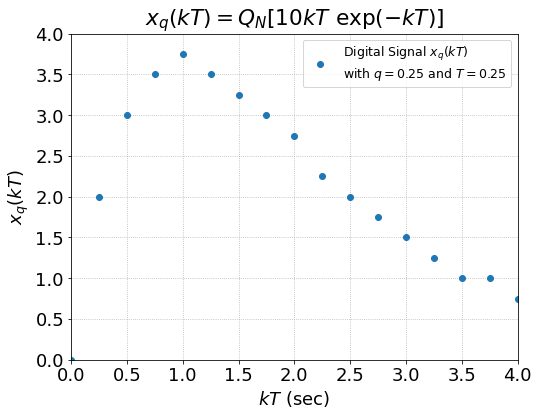

In [18]:
# Plot the digitized signal using discrete markers.

fig = plt.figure()
ax  = fig.add_subplot(111)

lbl = 'Digital Signal $x_q(kT)$\nwith $q=${!s} and $T=${!s}'.format(q,T)
ax.plot(k*T,x_qk,marker='o',ls='',label=lbl)

ax.set_xlim(0,4)
ax.set_ylim(0,4)
ax.set_title('$x_q(kT) = Q_N[10kT\ \exp(-kT)]$')
ax.set_xlabel('$kT$ (sec)')
ax.set_ylabel('$x_q(kT)$')

ax.legend(loc='upper right',fontsize='x-small')
plt.show()

# Comparing the Digital and Analog Signal
To compare the digital and analog signal, create a single plot that has both the analog and digital signal on it. **Make sure you have your labels and legends correct!**

**Hint:** You can start by copy-and-pasting the analog signal plot above and then modifying it. To overlay the second signal, simply issue the second plot command immediately after the first.

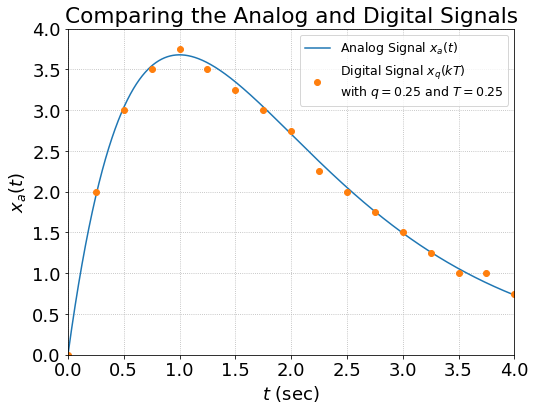

In [19]:
fig = plt.figure()
ax  = fig.add_subplot(111)
lbl = 'Analog Signal $x_a(t)$'
ax.plot(t,x_a,label=lbl)

lbl = 'Digital Signal $x_q(kT)$\nwith $q=${!s} and $T=${!s}'.format(q,T)
ax.plot(k*T,x_qk,marker='o',ls='',label=lbl)

ax.set_xlim(0,4)
ax.set_ylim(0,4)
ax.set_title('Comparing the Analog and Digital Signals')
ax.set_xlabel('$t$ (sec)')
ax.set_ylabel('$x_a(t)$')
ax.legend(loc='upper right',fontsize='x-small')
plt.show()

# Additional Resources
* [Matplotlib Gallery](https://matplotlib.org/gallery.html)
* Remember that when you don't know how to do something, Google and [StackOverflow](https://stackoverflow.com/) are your friends!

# Submitting to D2L
1. When you think you are finished, **do a clean run of the notebook** by going to "Kernel" $\rightarrow$ "Restart Kernel and Run All Cells".
2. **Double-check the output for any errors!** Doing the clean run may reveal things that you thought were working are actually broken.
3. **Save the notebook.**
4. **Upload the final `*.ipynb` file to the D2L dropbox.** This file is stored locally on your computer. In Jupyter Lab, you can find the file path by right-clicking on the notebook tab and selecting "Show File in Browser". Alternatively, you can download a copy of the notebook in your browser by going to "File" $\rightarrow$ "Download".